In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn
from scipy import stats

from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import lightgbm



In [2]:
# To manipulate data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING
from lightgbm import LGBMRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
#os.listdir('../input/milktrade/')
os.listdir('/Users/ajaykulkarni/OneDrive - George Mason University/Educational Data Mining/XGboost_models/Dataset_wheat/')

['Results_Wheat_dataset.xls',
 'LightGBM_Imp_gain.png',
 'LightGBM_Imp_split.png',
 'all_countries_wheat.csv',
 '.ipynb_checkpoints',
 'Updated_Model.ipynb']

In [4]:
data = pd.read_csv('all_countries_wheat.csv')
data['year'].unique()

array([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [5]:
data["Tariffs"].fillna(0, inplace = True) 

In [6]:
#data = pd.read_csv('../input/sugar22july/sugartrade.csv')
data = data[data['year']<2018]

In [7]:
data=data[data['value']>0]
data['value']

0       100533.448
1       133521.464
2       103273.824
3        68002.016
4        60873.128
           ...    
33712       95.300
33724     3073.699
33725     1400.856
33728     1361.112
33729     3573.192
Name: value, Length: 8700, dtype: float64

In [8]:
data.head()

,Unnamed: 0,Unnamed: 0.1,country_o,country_d,year,value,iso3_d,dynamic_code_d,landlocked_d,island_d,...,hostility_level_d,distance,common_language,colony_of_destination_after45,colony_of_destination_current,colony_of_destination_ever,colony_of_origin_after45,colony_of_origin_current,colony_of_origin_ever,Tariffs
0,0,37532,Algeria,Canada,1988,100533.448,CAN,CAN,0,0,...,0,7244.001,1,0,0,0,0,0,0,49.000
1,1,41254,Algeria,Canada,1989,133521.464,CAN,CAN,0,0,...,0,7244.001,1,0,0,0,0,0,0,49.000
2,2,45028,Algeria,Canada,1990,103273.824,CAN,CAN,0,0,...,0,7244.001,1,0,0,0,0,0,0,49.000
3,3,49055,Algeria,Canada,1991,68002.016,CAN,CAN,0,0,...,0,7244.001,1,0,0,0,0,0,0,49.000
4,4,53488,Algeria,Canada,1992,60873.128,CAN,CAN,0,0,...,0,7244.001,1,0,0,0,0,0,0,49.000


In [9]:
continents = ['Netherlands','Germany','France','New Zealand','United Kingdom']
data = data[data.country_o.isin(continents)]
data.shape

(1466, 74)

In [10]:
df5 = data[data['year'] < 2010]
df5.head()

,Unnamed: 0,Unnamed: 0.1,country_o,country_d,year,value,iso3_d,dynamic_code_d,landlocked_d,island_d,...,hostility_level_d,distance,common_language,colony_of_destination_after45,colony_of_destination_current,colony_of_destination_ever,colony_of_origin_after45,colony_of_origin_current,colony_of_origin_ever,Tariffs
8845,8845,92407,France,Albania,2000,33.837,ALB,ALB,0,0,...,0,1730.745,0,0,0,0,0,0,0,2.000
8846,8846,97255,France,Albania,2001,47.470,ALB,ALB,0,0,...,0,1730.745,0,0,0,0,0,0,0,2.000
8903,8903,92409,France,Argentina,2000,19.797,ARG,ARG,0,0,...,0,10852.152,1,0,0,0,0,0,0,5.000
8904,8904,97257,France,Argentina,2001,49.261,ARG,ARG,0,0,...,0,10852.152,1,0,0,0,0,0,0,5.000
8907,8907,111805,France,Argentina,2004,1.244,ARG,ARG,0,0,...,0,10852.152,1,0,0,0,0,0,0,5.000


In [11]:
## Updated code
df6 = data[data['year'] <= 2010]
df6.head()
#df6['value']
#df6['year'].unique()
# df6.shape = (1299, 75)

,Unnamed: 0,Unnamed: 0.1,country_o,country_d,year,value,iso3_d,dynamic_code_d,landlocked_d,island_d,...,hostility_level_d,distance,common_language,colony_of_destination_after45,colony_of_destination_current,colony_of_destination_ever,colony_of_origin_after45,colony_of_origin_current,colony_of_origin_ever,Tariffs
8826,8826,140987,France,Afghanistan,2010,79.529,AFG,AFG,1,0,...,0,5632.785,0,0,0,0,0,0,0,2.500
8845,8845,92407,France,Albania,2000,33.837,ALB,ALB,0,0,...,0,1730.745,0,0,0,0,0,0,0,2.000
8846,8846,97255,France,Albania,2001,47.470,ALB,ALB,0,0,...,0,1730.745,0,0,0,0,0,0,0,2.000
8855,8855,140988,France,Albania,2010,758.173,ALB,ALB,0,0,...,0,1730.745,0,0,0,0,0,0,0,2.000
8903,8903,92409,France,Argentina,2000,19.797,ARG,ARG,0,0,...,0,10852.152,1,0,0,0,0,0,0,5.000


In [12]:
## Updated code
df7 = data[data['year'] > 2010]
df7.head()
df7['year'].unique()
# df7.shape = (604, 75)

array([2014, 2011, 2012, 2013, 2015, 2016])

In [13]:
y=data['value']
## Updated code
y1 = df6['value']
y2 = df7['value']

In [14]:
#train = data.iloc[ :df5.shape[0]]
#test = data.iloc[df5.shape[0]:]
#trainy = y.iloc[:df5.shape[0]]
#testy = y.iloc[df5.shape[0]:]

## Updated code
y1 = df6['value']
y2 = df7['value']
train = df6.loc[:, df6.columns != 'value']
test = df7.loc[:, df7.columns != 'value']
trainy = y1
testy = y2

In [15]:
df20 = test[['country_o','country_d','year']]
df20.head()
df20['year'].unique()

array([2014, 2011, 2012, 2013, 2015, 2016])

In [16]:
data = pd.get_dummies(data)
data.head()
#data.shape
#y=data['value']

,Unnamed: 0,Unnamed: 0.1,year,value,landlocked_d,island_d,gdp_pwt_const_d,pop_d,gdp_pwt_cur_d,capital_cur_d,...,iso3_o_GBR,iso3_o_NLD,iso3_o_NZL,dynamic_code_o_DEU,dynamic_code_o_FRA,dynamic_code_o_GBR,dynamic_code_o_NLD,dynamic_code_o_NZL,region_o_europe,region_o_pacific
8826,8826,140987,2010,79.529,1,0,0.000,0.000,0.000,0.000,...,0,0,0,0,1,0,0,0,1,0
8845,8845,92407,2000,33.837,0,0,16415.789,3.122,15860.172,33585.980,...,0,0,0,0,1,0,0,0,1,0
8846,8846,97255,2001,47.470,0,0,16868.885,3.124,16339.177,35365.605,...,0,0,0,0,1,0,0,0,1,0
8855,8855,140988,2010,758.173,0,0,26685.547,2.902,26839.920,94202.336,...,0,0,0,0,1,0,0,0,1,0
8859,8859,160414,2014,0.086,0,0,31845.375,2.890,31419.963,112792.830,...,0,0,0,0,1,0,0,0,1,0


In [17]:
data = data[['year','landlocked_d','island_d','pop_d','gdp_wdi_cap_cur_d','lat_d','lng_d',
'polity_d','landlocked_o','island_o','pop_o','gdp_wdi_cap_cur_o','lat_o','lng_o','polity_o','contiguity','agree_pta_goods','agree_pta_services',
'agree_cu','agree_eia','agree_fta','sanction_threat_trade','sanction_imposition_trade','member_eu_o','member_wto_o','member_gatt_o',
'member_eu_d','member_wto_d','member_gatt_d','hostility_level_o','hostility_level_d','distance','common_language','colony_of_destination_ever',
'colony_of_origin_ever', 'Tariffs', 'value']]
#data['year'].unique()
data.shape

(1466, 37)

In [18]:
#data=data.drop(['value','Unnamed: 0','gdp_wdi_cur_d','gdp_wdi_const_d','gdp_wdi_cap_cur_d','gdp_wdi_cap_const_d',
 #            'gdp_pwt_cur_o','gdp_wdi_cur_o','gdp_wdi_const_o','gdp_wdi_cap_cur_o','gdp_wdi_cap_const_o','gdp_pwt_cur_d'],axis=1)
#df5 = data[data['year'] < 2010]
#df5.shape


# Updated code
df6 = data[data['year'] <= 2010]
#df6.head()
#df6['year'].unique()
#df6.shape #= (27153, 36)

## Updated code
df7 = data[data['year'] > 2010]
#df7.head()
#df7['year'].unique()
#df7.shape #= (7290, 36)


In [19]:
#train = data.iloc[ :df5.shape[0]]
#test = data.iloc[df5.shape[0]:]
#trainy = y.iloc[:df5.shape[0]]
#testy = y.iloc[df5.shape[0]:]

## Updated code
y1 = df6['value']
y2 = df7['value']
train = df6.loc[:, df6.columns != 'value']
test = df7.loc[:, df7.columns != 'value']
trainy = y1
testy = y2

In [20]:
df5 = train[train['year'] < 2005]
df5.shape

(570, 36)

In [21]:
X_train = train.iloc[ :df5.shape[0]]
X_val = train.iloc[df5.shape[0]:]
y_train = trainy.iloc[:df5.shape[0]]
y_val = trainy.iloc[df5.shape[0]:]

In [22]:
print(X_train.shape)
print(X_val.shape)
print(test.shape)

X_train.head()

(570, 36)
(335, 36)
(561, 36)


,year,landlocked_d,island_d,pop_d,gdp_wdi_cap_cur_d,lat_d,lng_d,polity_d,landlocked_o,island_o,...,member_eu_d,member_wto_d,member_gatt_d,hostility_level_o,hostility_level_d,distance,common_language,colony_of_destination_ever,colony_of_origin_ever,Tariffs
8826,2010,1,0,0.000,569.941,34.649,67.114,0,0,0,...,0,0,0,0,0,5632.785,0,0,0,2.500
8845,2000,0,0,3.122,1175.789,41.094,20.046,5,0,0,...,0,1,0,0,0,1730.745,0,0,0,2.000
8846,2001,0,0,3.124,1326.970,41.094,20.046,5,0,0,...,0,1,0,0,0,1730.745,0,0,0,2.000
8855,2010,0,0,2.902,4094.359,41.094,20.046,9,0,0,...,0,1,0,0,0,1730.745,0,0,0,2.000
8903,2000,0,0,37.057,7669.274,-34.092,-63.943,8,0,0,...,0,1,1,0,0,10852.152,1,0,0,5.000


In [23]:
import lightgbm
lgtrain = lightgbm.Dataset(train,trainy)
lgvalid = lightgbm.Dataset(test,testy)


In [24]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 100,
    'max_depth': 10,
    'learning_rate' : 0.1,
    'feature_fraction' : 0.6,
    'verbosity' : -1
}
lgb_clf = lgb.train(
    params,
    lgtrain,
    500,
    valid_sets=[lgtrain, lgvalid],
    valid_names=["train", "valid"],
    early_stopping_rounds=50,
    verbose_eval=500
)
#print("RMSE of the validation set:", np.sqrt(mean_squared_error(y_valid, lgb_clf.predict(X_valid))))

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[401]	train's rmse: 2833.5	valid's rmse: 29574.8


In [25]:
print("R^2 of the validation set:", r2_score(testy, lgb_clf.predict(test)))

#lgb.plot_importance(lgb_clf, importance_type='split', max_num_features=20)

R^2 of the validation set: 0.6351463589558548


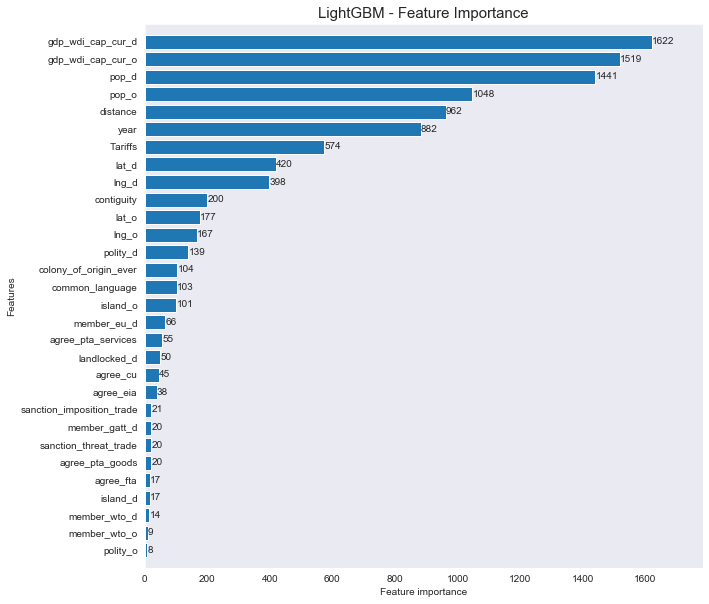

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
lgb.plot_importance(lgb_clf,height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

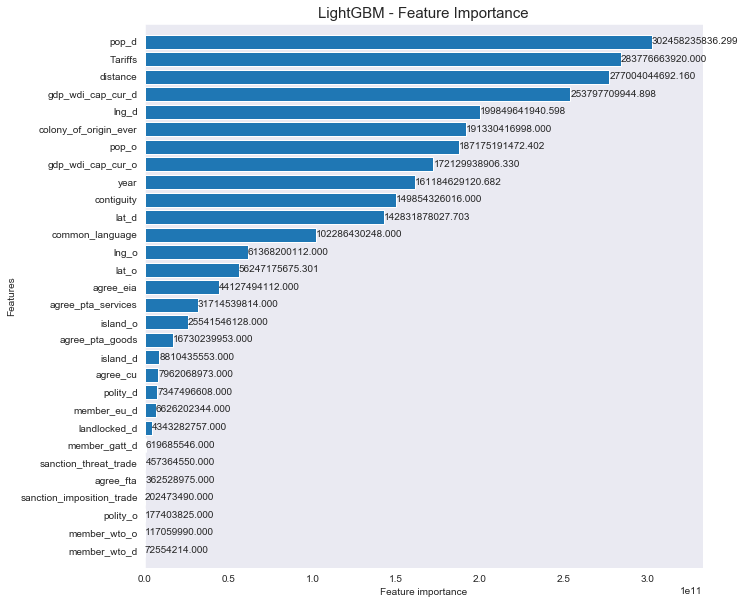

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
lgb.plot_importance(lgb_clf,importance_type = "gain",height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [28]:
LGBPRED=lgb_clf.predict(test)
pd.DataFrame(LGBPRED).to_csv('LGBPRED_updated.csv')
pd.DataFrame(test).to_csv('test.csv')
df20.to_csv('df20.csv')
testy.to_csv('testy.csv')

In [29]:
import xgboost
best_xgb_model = xgboost.XGBRegressor()
best_xgb_model.fit(train,trainy)
print("R^2 of the test set:", r2_score(testy, best_xgb_model.predict(test)))

[09:28:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 of the test set: 0.5912687471542575


In [30]:
XGB=best_xgb_model.predict(test)
pd.DataFrame(XGB).to_csv('XGB_updated.csv')

In [31]:
feat_names = train.columns.values
feat_names

array(['year', 'landlocked_d', 'island_d', 'pop_d', 'gdp_wdi_cap_cur_d',
       'lat_d', 'lng_d', 'polity_d', 'landlocked_o', 'island_o', 'pop_o',
       'gdp_wdi_cap_cur_o', 'lat_o', 'lng_o', 'polity_o', 'contiguity',
       'agree_pta_goods', 'agree_pta_services', 'agree_cu', 'agree_eia',
       'agree_fta', 'sanction_threat_trade', 'sanction_imposition_trade',
       'member_eu_o', 'member_wto_o', 'member_gatt_o', 'member_eu_d',
       'member_wto_d', 'member_gatt_d', 'hostility_level_o',
       'hostility_level_d', 'distance', 'common_language',
       'colony_of_destination_ever', 'colony_of_origin_ever', 'Tariffs'],
      dtype=object)

In [32]:
importances = best_xgb_model.feature_importances_ 
importances

array([0.02668872, 0.00274043, 0.00048489, 0.0361729 , 0.01787133,
       0.01871462, 0.01893743, 0.34862217, 0.        , 0.00581754,
       0.00911576, 0.02649121, 0.00387411, 0.02137559, 0.        ,
       0.10777019, 0.00095525, 0.04411132, 0.        , 0.06871232,
       0.00407411, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0041406 , 0.00152827, 0.00793288, 0.        ,
       0.        , 0.0175396 , 0.14505415, 0.        , 0.0026034 ,
       0.05867124], dtype=float32)

In [33]:
feat_names = train.columns.values
importances = best_xgb_model.feature_importances_ 

std = np.std([tree.feature_importances_ for tree in best_xgb_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="c", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

AttributeError: 'XGBRegressor' object has no attribute 'estimators_'

In [34]:
#train.isnull().values.any()

In [35]:
from sklearn import ensemble
import matplotlib.pyplot as plt
model = ensemble.RandomForestRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train, trainy)
from sklearn.metrics import r2_score
r2_score(testy,model.predict(test))

0.6469123378322812

In [36]:
RF=model.predict(test)
pd.DataFrame(RF).to_csv('RF.csv')

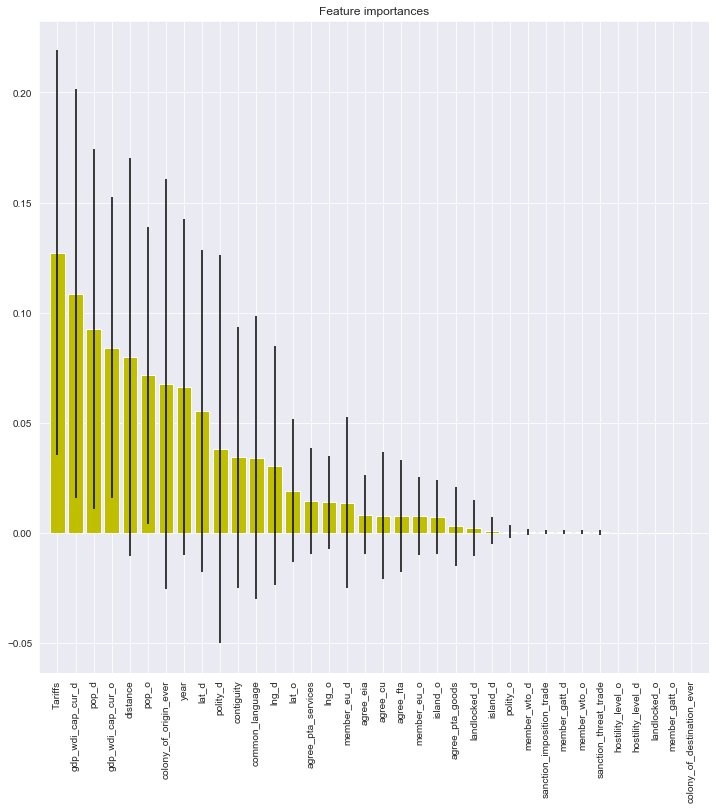

In [37]:
feat_names = train.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="y", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [38]:
from sklearn import ensemble
import matplotlib.pyplot as plt
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train, trainy)
from sklearn.metrics import r2_score
r2_score(testy,model.predict(test))

0.7023936664946959

In [39]:
ExtraTreesRegressor=model.predict(test)
pd.DataFrame(ExtraTreesRegressor).to_csv('ExtraTreesRegressor.csv')

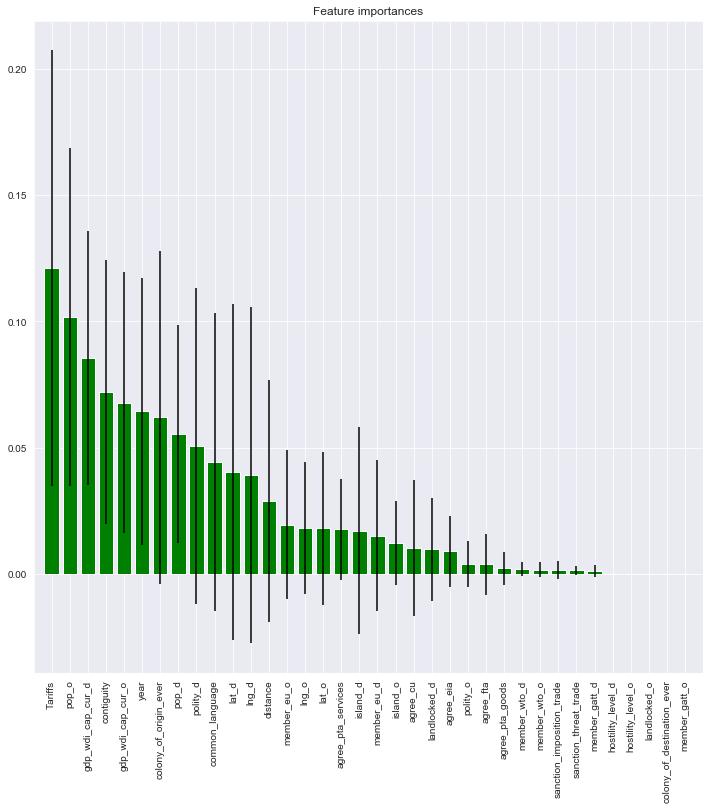

In [40]:
feat_names = train.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [26]:
## New addition
LGBPRED=lgb_clf.predict(test)
pd.DataFrame(LGBPRED).to_csv('LGBPRED_updated.csv')
pd.DataFrame(test).to_csv('test.csv')
df20.to_csv('df20.csv')
testy.to_csv('testy.csv')
pd.DataFrame(LGBPRED).to_csv('LGBPRED.csv')